# Task00 - Data Ingestion
## Purpose -
 * Data to be used for this project is a subset of data that contains remote sensing and gas exchange information. The prupose of this notebook is to make that subset from files stored on my OneDrive and save it to this project directory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pc = pd.read_csv(r'C:\Users\bdub\OneDrive - Michigan State University\DataWareHouse\CLEANED\RemoteSensingCSVs\RGBAutoHts.csv')
df_ref = pd.read_csv(r'C:\Users\bdub\OneDrive - Michigan State University\DataWareHouse\CLEANED\RemoteSensingCSVs\MultiSpec.csv')
df_meta = pd.read_csv(r'C:\Users\bdub\OneDrive - Michigan State University\DataWareHouse\CLEANED\MasterCSVs\MasterMetaData.csv')
df_agro = pd.read_csv(r'C:\Users\bdub\OneDrive - Michigan State University\DataWareHouse\CLEANED\MasterCSVs\MasterAgronData.csv')
df_gasex = pd.read_csv(r'C:\Users\bdub\OneDrive - Michigan State University\DataWareHouse\CLEANED\MasterCSVs\MasterGasExData.csv')


In [3]:
# formatting
dfs = [df_pc, df_ref, df_agro, df_meta, df_gasex]
for df in dfs:
    df['YEAR'] = df['YEAR'].astype('str')
    try:
        df['PLOT'] = df['PLOT'].astype('str')
    except:
        continue

In [4]:
# Subset those with gas_ex measurements
df_gasex = pd.merge(df_meta, df_gasex, on = ['PLOT_YEAR', 'PLOT', 'YEAR'], how='inner')

# drop some unneeded columns
col2drop = ['FTREATMENT', 'TYPE', 'date', 'time']
df_gasex.drop(columns=col2drop, inplace=True)

# Plot_Years of interest
plots2keep = set(df_gasex['PLOT_YEAR'].values)
# keys for merging
keys = ['PLOT_YEAR', 'PLOT', 'YEAR']


In [5]:
df_pc = df_pc.loc[df_pc['PLOT_YEAR'].isin(plots2keep)]
df_ref = df_ref.loc[df_ref['PLOT_YEAR'].isin(plots2keep)]
df_agro = df_agro.loc[df_agro['PLOT_YEAR'].isin(plots2keep)]

In [6]:
# merge agronomic traits of interest with gas ex
cols2keep = ['KERNELDRYWT_PERPLANT', 'KERNELMOISTURE_P', 'DAYSTOANTHESIS',
              'DAYSTOSILK', 'ASI', 'AVGFLAGHT_CM', 'ROOTLODGING', 'STALKLODGING'] + keys

df_agro = df_agro.loc[:, cols2keep]

In [7]:
df_gasex = pd.merge(df_gasex, df_agro, on=keys, how='inner')

<Axes: >

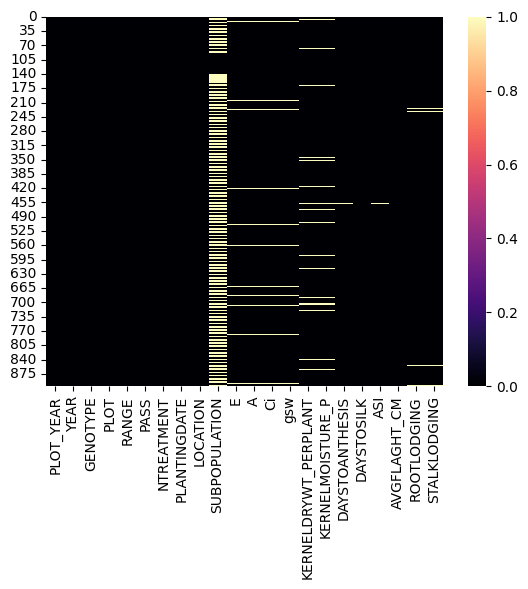

In [8]:
#plt.figure(figsize=(4,8))
# sns.heatmap(df.isna().transpose(), cmap="plasma")
# sns.heatmap(df.isna(), cmap="viridis")
sns.heatmap(df_gasex.isna(), cmap="magma")